---

# Langages de script - Python
## Cours 8.2 — Git
### M2 Ingénierie Multilingue - INaLCO

---

- Loïc Grobol <loic.grobol@gmail.com>
- Yoann Dupont <yoa.dupont@gmail.com>

Note: ceci est une introduction, elle est un peu sale, ne pas se limiter à ces slides

## Au commencement

`rm -rf ~/tmp/test ~/tmp/truc ~ /Documents/tmp/machin`

## Pourquoi des versions

- Pour faire des sauvegardes en cas de grosse boulette
- Pour garder trace des états intermédaires (avant relecture, après relecture, version à rendre…)
- Pour pouvoir travailler sur plusieurs chose en parallèle (ajouter une fonction et corrigere un bug) sans conflit

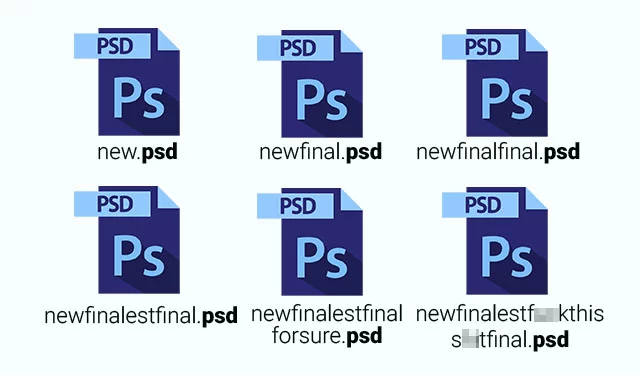

## Un peu plus malin

Garder plein de versions en parallèle comme ça c'est

- Le bazar
- L'assurance de se tromper


On peut faire un peu mieux avec un historique en continu, par exemple [etherpad](https://mensuel.framapad.org/p/I7bgWlDpVS) le fait tout seul.

Certains systèmes d'exploitation ou éditeurs le font aussi pour vous.

## Mais

Vous n'avez pas le contrôle sur les sauvegardes et vous dépendez du bon vouloir du système automatique

- Il y a en général une limite au nombre de versions sauvegardées
- Vous ne contrôlez pas la granularité des sauvegardes : trop fréquentes, trop éloignées, vous ne pouvez pas choisir
- Si deux personnes travaillent en parallèle sur des version différentes, on ne peut pas garder les deux historiques

## Les choses sérieuses

Pour faire mieux que ça, on peut utiliser un outil fait exprès : un _**V**ersion **C**ontrol **S**ystem_

Il y en a plusieurs, les plus connus

- CSV
- Bazaar
- Mercurial
- Git

On va se concentrer sur le dernier qui est le plus utilisé mais les autres marchent similairement

## Un premier repo

Dans un dossier, de préférence vide, sur votre machine, entrez

```bash
git init
```

Vous avez créé un dépôt (*repository*) un dossier dont vous allez pouvoir enregister et gérer des versions d'un travail.

À ce stade la seule différence est qu'un dossier `.git` a été créé, où git va stocker ses données. Entrez `git status` pour vérifier que tout va bien.

On va commencer par une toute petite configuration pour dire à git qui vous êtes

```bash
git config user.name "Inigo Montoya"
git config user.email "prepare.to@godaddy.com"
```

## Un premier commit

Entrez

```bash
touch projet.py
```

pour créer un fichier vide. Puis de nouveau `git status`.

git vous informe que quelque chose a changé dans votre dossier : il y a un nouveau fichier mais pour l'instant il ne suit pas ses changements.

Entrez les commandes suivantes

```bash
git add projet.py
git status
```

À présent git voit notre fichier et ses modifications (passer de la non-existence à l'existence), mais le changement n'a pas encore été enregistré.
Pour ça

```bash
git commit -m "ajout initial"
```

À présent `git status` vous informe qu'il n'y a plus de changements non-enregistrés.

## The sacred Jedi texts

```bash
git log
```

vous donnera l'historique de vos changements. À lancer comme `git log -p` pour avoir aussi les diffs.

## Abort mission !

Ajoutons un peu de code à `projet.py`

```bash
echo "print('hello, world')" > projet.py
python3 projet.py
git commit -am "make it do something"
```

Puis faisons une bêtise

```bash
rm projet.py
ls
```

Malheur ! On a détruit le projet. Comment on le récupère ?

```bash
git checkout "projet.py"
ls
```

## Retour vers le passé

Faisons en vitesse quelques autres changements

```bash
echo "print('spam')" > projet.py && git commit -am "add spam" && echo "print('ham')" > projet.py && git commit -am "change to ham"
```

Vérifiez l'historique avec `git log`

Vous devriez voir quelque chose comme ça

```log
commit ec954d18c9686773ce616e16af04b6912abd2413 (HEAD -> master)
Author: Inigo Montoya <prepare.to@godaddy.com>
Date:   Tue Nov 5 21:19:15 2019 +0100

    change to ham

commit a7b576b62accff1cec652f6a313e37ce784c8254
Author: Inigo Montoya <prepare.to@godaddy.com>
Date:   Tue Nov 5 21:19:15 2019 +0100

    add spam
```

Pour mettre le dossier dans l'état où il était avant "change to ham", il suffit d'entrer

```bash
git checkout a7b576b62accff1cec652f6a313e37ce784c8254
```

(on peut se contenter de premiers caractères du hash)

et pour revenir à la dernière version

```bash
git checkout master
```

On peut aussi combiner les deux versions de `checkout`

```bash
git checkout a7b576b62accff1cec652f6a313e37ce784c8254 -- projet.py
```